In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
consuResiPorRegiao = pd.read_csv("./databases/tratado/consumo residencial por regiao/consumo residencial por regiao.csv",index_col=[0,1])

In [73]:
#os 15 primeiros registros
consuResiPorRegiao.head(15)

JAN      FEV      MAR      ABR      MAI      JUN  \
ANO  REGIAO                                                               
2023 Norte          908626   864397   948603   936381   999291  1044363   
     Nordeste      2805490  2778418  2861484  2795542  2923572  2711658   
     Sudeste       5855815  6333221  6829244  6388977  5936085  5888541   
     Sul           2347905  2605102  2503873  2354969  2049470  2064325   
     Centro-Oeste  1152181  1149605  1223054  1227059  1170399  1129768   
2022 Norte          878646   829751   886754   860992   899520   899714   
     Nordeste      2687342  2575410  2805342  2628482  2676007  2469484   
     Sudeste       5992623  6037501  6641314  6255458  5701319  5493265   
     Sul           2347818  2348276  2392262  1963268  1873783  1994035   
     Centro-Oeste  1157091  1129228  1194911  1163840  1126353  1059951   
2021 Norte          829320   798266   811549   863586   857418   890071   
     Nordeste      2763245  2623494  2731576  2778757  2541573  2567474   
     Sudeste       6604401  6235408  6357289  6390169  5626107  5549613   
     Sul           2273434  2119585  2205119  2122892  1881304  1873584   
     Centro-Oeste  1183630  1099086  1150854  1203491  1067692  1119338   

                       JUL      AGO      SET      OUT      NOV      DEZ  
ANO  REGIAO                                                              
2023 Norte         1036735  1123220  1186719  1222328  1235789  1171554  
     Nordeste      2611503  2703657  2874947  2899670  3119037  3097885  
     Sudeste       5751792  5929765  6212348  6607791  6880970  7080335  
     Sul           2112131  2062813  2092123  2210632  2176246  2446622  
     Centro-Oeste  1071272  1179502  1318678  1479546  1529415  1522554  
2022 Norte          923014   995812  1032571  1044150   982073   989692  
     Nordeste      2467219  2492009  2614393  2653201  2807406  2839078  
     Sudeste       5539689  5545785  5694638  5755198  5951935  6316138  
     Sul           1988103  1948832  1980822  1936082  2004807  2282811  
     Centro-Oeste  1058762  1093208  1182929  1216586  1203484  1260871  
2021 Norte          852598   908326   973482   961855   943441   931826  
     Nordeste      2479002  2462667  2560694  2679149  2668152  2831641  
     Sudeste       5404190  5472932  5975072  5758807  5674137  6024669  
     Sul           1964097  1982015  1836742  1878103  1945066  2082091  
     Centro-Oeste  1000703  1010658  1250428  1260245  1146710  1214616

In [74]:
#consuResiPorRegiao.index.levels[0].astype("string")
#consuResiPorRegiao.index.get_level_values(0).astype("string")
consuResiPorRegiao.index=consuResiPorRegiao.index.set_levels(consuResiPorRegiao.index.levels[0].astype("string"), level=0)

Checando o tipo das colunas:

In [75]:
consuResiPorRegiao.dtypes

JAN    int64
FEV    int64
MAR    int64
ABR    int64
MAI    int64
JUN    int64
JUL    int64
AGO    int64
SET    int64
OUT    int64
NOV    int64
DEZ    int64
dtype: object

In [76]:
#Converte para ano
consuResiPorRegiao.index=consuResiPorRegiao.index.set_levels(consuResiPorRegiao.index.levels[0].astype("datetime64[ns]").year, level=0)

In [77]:
#Ordena
consuResiPorRegiao.sort_index(axis=0, level=0, inplace=True)
consuResiPorRegiao

JAN      FEV      MAR      ABR      MAI      JUN  \
ANO  REGIAO                                                               
2004 Centro-Oeste   506540   472103   493181   506071   492808   466359   
     Nordeste      1098664  1000221  1049437  1097251  1033007  1002351   
     Norte          348585   323403   320237   339775   332155   332089   
     Sudeste       3694386  3511541  3629455  3733863  3537269  3433443   
     Sul           1132506  1121970  1108027  1132047  1082103  1056850   
...                    ...      ...      ...      ...      ...      ...   
2023 Centro-Oeste  1152181  1149605  1223054  1227059  1170399  1129768   
     Nordeste      2805490  2778418  2861484  2795542  2923572  2711658   
     Norte          908626   864397   948603   936381   999291  1044363   
     Sudeste       5855815  6333221  6829244  6388977  5936085  5888541   
     Sul           2347905  2605102  2503873  2354969  2049470  2064325   

                       JUL      AGO      SET      OUT      NOV      DEZ  
ANO  REGIAO                                                              
2004 Centro-Oeste   470539   479192   514971   529450   505694   513252  
     Nordeste       969181   962934  1041242  1046249  1083212  1104220  
     Norte          328423   338836   351459   353207   362279   355894  
     Sudeste       3457623  3453322  3596160  3608130  3608515  3569438  
     Sul           1066705  1070192  1100557  1069478  1071490  1100567  
...                    ...      ...      ...      ...      ...      ...  
2023 Centro-Oeste  1071272  1179502  1318678  1479546  1529415  1522554  
     Nordeste      2611503  2703657  2874947  2899670  3119037  3097885  
     Norte         1036735  1123220  1186719  1222328  1235789  1171554  
     Sudeste       5751792  5929765  6212348  6607791  6880970  7080335  
     Sul           2112131  2062813  2092123  2210632  2176246  2446622  

[100 rows x 12 columns]

Consumo total por cada região

In [78]:
consuResiPorRegiao["total_por_regiao"] = consuResiPorRegiao.apply(np.sum, axis=1)
consuResiPorRegiao

JAN      FEV      MAR      ABR      MAI      JUN  \
ANO  REGIAO                                                               
2004 Centro-Oeste   506540   472103   493181   506071   492808   466359   
     Nordeste      1098664  1000221  1049437  1097251  1033007  1002351   
     Norte          348585   323403   320237   339775   332155   332089   
     Sudeste       3694386  3511541  3629455  3733863  3537269  3433443   
     Sul           1132506  1121970  1108027  1132047  1082103  1056850   
...                    ...      ...      ...      ...      ...      ...   
2023 Centro-Oeste  1152181  1149605  1223054  1227059  1170399  1129768   
     Nordeste      2805490  2778418  2861484  2795542  2923572  2711658   
     Norte          908626   864397   948603   936381   999291  1044363   
     Sudeste       5855815  6333221  6829244  6388977  5936085  5888541   
     Sul           2347905  2605102  2503873  2354969  2049470  2064325   

                       JUL      AGO      SET      OUT      NOV      DEZ  \
ANO  REGIAO                                                               
2004 Centro-Oeste   470539   479192   514971   529450   505694   513252   
     Nordeste       969181   962934  1041242  1046249  1083212  1104220   
     Norte          328423   338836   351459   353207   362279   355894   
     Sudeste       3457623  3453322  3596160  3608130  3608515  3569438   
     Sul           1066705  1070192  1100557  1069478  1071490  1100567   
...                    ...      ...      ...      ...      ...      ...   
2023 Centro-Oeste  1071272  1179502  1318678  1479546  1529415  1522554   
     Nordeste      2611503  2703657  2874947  2899670  3119037  3097885   
     Norte         1036735  1123220  1186719  1222328  1235789  1171554   
     Sudeste       5751792  5929765  6212348  6607791  6880970  7080335   
     Sul           2112131  2062813  2092123  2210632  2176246  2446622   

                   total_por_regiao  
ANO  REGIAO                          
2004 Centro-Oeste           5950160  
     Nordeste              12487969  
     Norte                  4086342  
     Sudeste               42833145  
     Sul                   13112492  
...                             ...  
2023 Centro-Oeste          15153033  
     Nordeste              34182863  
     Norte                 12678006  
     Sudeste               75694884  
     Sul                   27026211  

[100 rows x 13 columns]

In [79]:
#reset_index remove os indices atuais e transforma os anteriores em colunas
#diferente de stack que transforma o df em uma series com as colunas e indices transformadas em chaves
resetado=consuResiPorRegiao[["total_por_regiao"]].reset_index()
resetado

,ANO,REGIAO,total_por_regiao
0,2004,Centro-Oeste,5950160
1,2004,Nordeste,12487969
2,2004,Norte,4086342
3,2004,Sudeste,42833145
4,2004,Sul,13112492
...,...,...,...
95,2023,Centro-Oeste,15153033
96,2023,Nordeste,34182863
97,2023,Norte,12678006
98,2023,Sudeste,75694884


[]

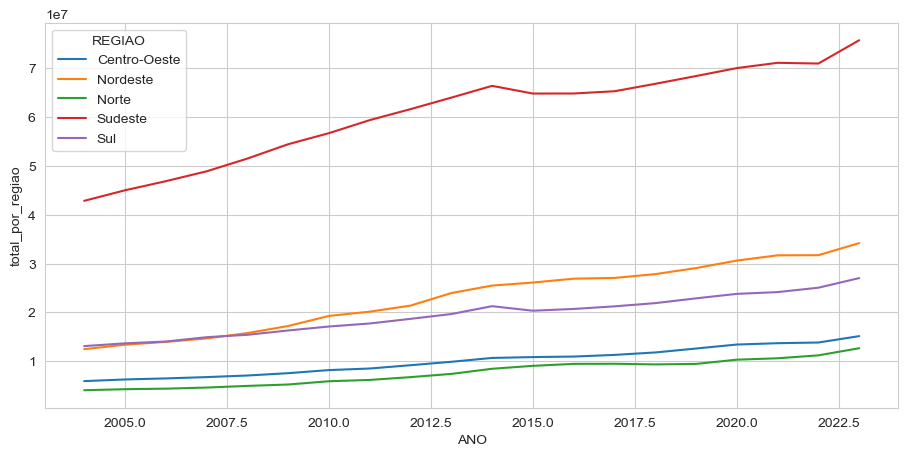

In [80]:

#Plotando o consumo total por região através dos anos
fig = plt.figure(figsize=(11,5))

sns.lineplot(data=resetado.sort_values("ANO"), x="ANO",hue="REGIAO" ,y="total_por_regiao")
plt.plot()

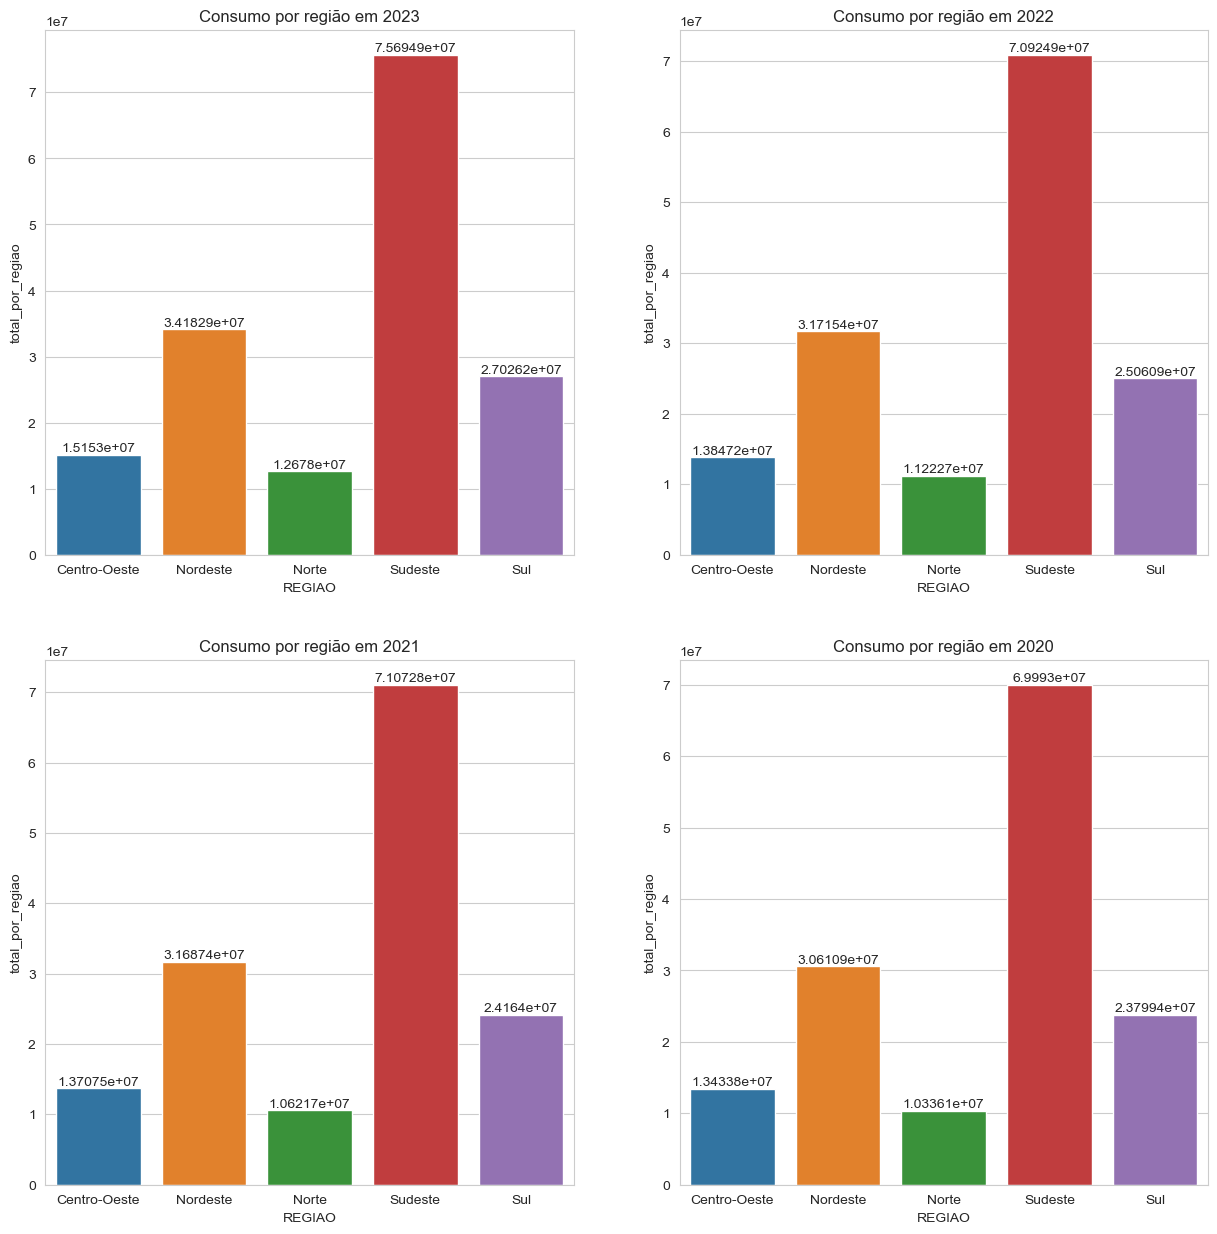

In [81]:
#Gráfico de barras do consumo total por região nos 4 primeiros anos
#consuResiPorRegiao.loc[2023].plot(kind="bar", y="total_por_regiao",legend="Consumo total por região em 2023")

def plotConsumoPorRegiao(ano:int):

    ax = sns.barplot(x="REGIAO", y="total_por_regiao", data=resetado[resetado["ANO"] == ano])
    ax.set_title("Consumo por região em %d"%(ano))
    for i in ax.containers:
        ax.bar_label(i, )

    return ax

fig = plt.figure(figsize=(15,15))

fig.add_subplot(221)
plotConsumoPorRegiao(2023)

fig.add_subplot(222)
plotConsumoPorRegiao(2022)

fig.add_subplot(223)
plotConsumoPorRegiao(2021)

fig.add_subplot(224)
plotConsumoPorRegiao(2020)

plt.show()

#sns.barplot(x="REGIAO", y="total_por_regiao", data=resetado[resetado["ANO"] == 2004])

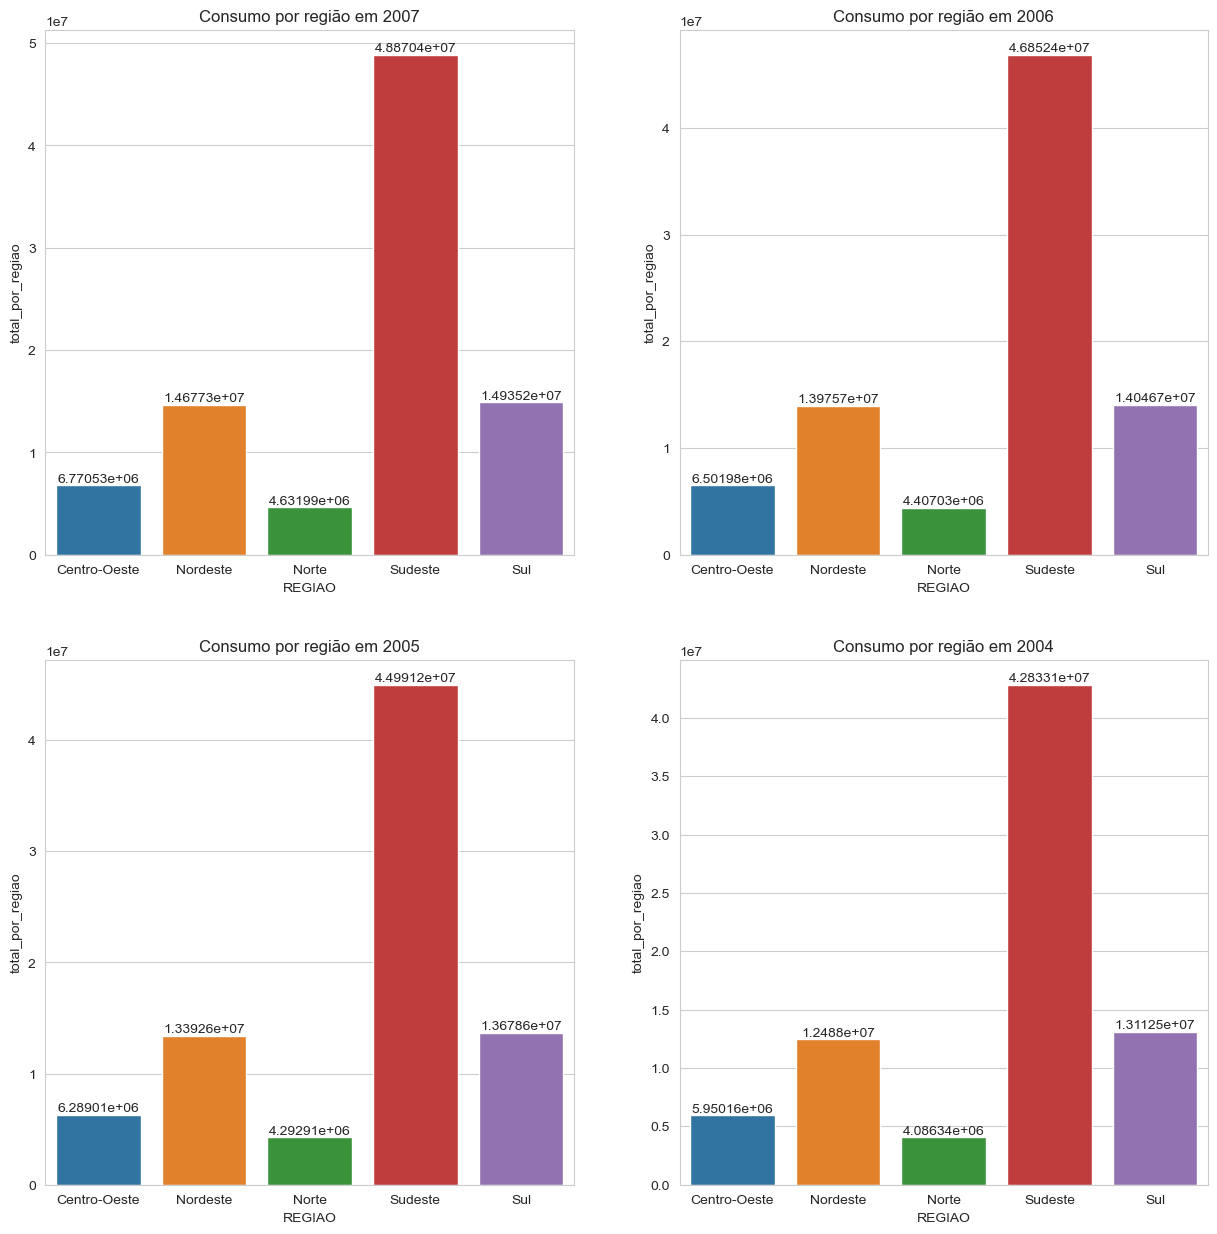

In [82]:

#Consumo nos quatro últimos anos

fig2 = plt.figure(figsize=(15,15))

fig2.add_subplot(221)
plotConsumoPorRegiao(2007)

fig2.add_subplot(222)
plotConsumoPorRegiao(2006)

fig2.add_subplot(223)
plotConsumoPorRegiao(2005)

fig2.add_subplot(224)
plotConsumoPorRegiao(2004)

plt.show()

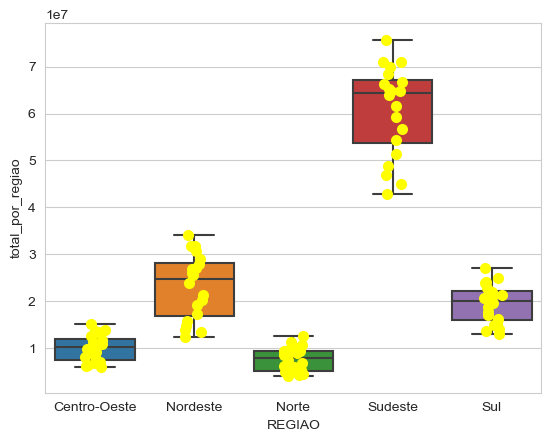

In [83]:

sns.set_style("whitegrid")
sns.boxplot(x="REGIAO", y="total_por_regiao", data=resetado)
sns.stripplot(x="REGIAO", y="total_por_regiao", data=resetado,dodge=True, color="yellow", size=8)
plt.show()

In [84]:
#Descrição do consumo total regional
resetado[["REGIAO","total_por_regiao"]].groupby("REGIAO").describe()

total_por_regiao                                         \
                        count         mean           std         min   
REGIAO                                                                 
Centro-Oeste             20.0  10021635.65  2.848071e+06   5950160.0   
Nordeste                 20.0  23151543.75  6.906903e+06  12487969.0   
Norte                    20.0   7708311.10  2.637567e+06   4086342.0   
Sudeste                  20.0  60751556.90  9.615701e+06  42833145.0   
Sul                      20.0  19457995.45  4.071134e+06  13112492.0   

                                                                
                      25%         50%          75%         max  
REGIAO                                                          
Centro-Oeste   7453924.50  10296945.0  12013744.00  15153033.0  
Nordeste      16860201.00  24730048.5  28149445.50  34182863.0  
Norte          5185007.50   7949677.5   9481291.25  12678006.0  
Sudeste       53680884.00  64365586.5  67171691.00  75694884.0  
Sul           16088707.75  20011802.0  22148920.50  27026211.0

# Predição com SVR

In [85]:
from sklearn.model_selection import train_test_split

# Prevendo o consumo anual de cada região

Norte:

In [86]:
#Checar se está ordenado por ano
resetado

,ANO,REGIAO,total_por_regiao
0,2004,Centro-Oeste,5950160
1,2004,Nordeste,12487969
2,2004,Norte,4086342
3,2004,Sudeste,42833145
4,2004,Sul,13112492
...,...,...,...
95,2023,Centro-Oeste,15153033
96,2023,Nordeste,34182863
97,2023,Norte,12678006
98,2023,Sudeste,75694884


In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MinMaxScaler

In [88]:
regiao = "Norte"
quartil_superior=resetado[resetado["REGIAO"] == regiao]["total_por_regiao"].describe().loc["75%"]
quartil_inferior=resetado[resetado["REGIAO"] == regiao]["total_por_regiao"].describe().loc["25%"]
IQR = quartil_superior - quartil_inferior
limite_superior = quartil_superior + 1.5 * IQR
limite_inferior = quartil_inferior - 1.5 * IQR

consumo_total_norte = resetado[resetado["REGIAO"] == regiao].drop("REGIAO", axis=1)
filtro = (consumo_total_norte["total_por_regiao"] > limite_inferior) & (consumo_total_norte["total_por_regiao"] < limite_superior)
consumo_total_norte = consumo_total_norte[filtro]
consumo_total_norte


,ANO,total_por_regiao
2,2004,4086342
7,2005,4292906
12,2006,4407034
17,2007,4631987
22,2008,4969426
27,2009,5256868
32,2010,5922569
37,2011,6194225
42,2012,6764162
47,2013,7425023


In [89]:
#Extraindo as features e target:
X=resetado[resetado["REGIAO"] == regiao]["ANO"]
y=resetado[resetado["REGIAO"] == regiao]["total_por_regiao"]

In [90]:
#Construindo o modelo:
from sklearn.svm import SVR




# Cross-validation

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import KFold
n = 3
kfol = KFold(n_splits=5)
tss = TimeSeriesSplit(n_splits=n)

model = SVR(kernel="linear", C=1.0)
modeloLinear = TransformedTargetRegressor(regressor=model, transformer=MinMaxScaler())
cross_val_score(modeloLinear, X.values.reshape(-1, 1), y, scoring="r2", cv=tss)


array([-0.73869257, -6.10850166,  0.66912293])

In [92]:
#res = TransformedTargetRegressor(regressor=model, transformer=MinMaxScaler())
xtrain = []
ytrain = []
xtest = []
ytest = []
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xtrain.append(X_train)
    xtest.append(X_test)

    ytrain.append(y_train)
    ytest.append(y_test)




#fig = plt.figure(figsize=(15,15))
#fig.add_subplot(221)
#plt.plot(xtrain[a], ytrain[a])
#plt.plot(xtest[a], ytest[a])
#fig.add_subplot(222)
#plt.plot(xtrain[a], ytrain[a])
#plt.plot(xtest[a], ytest[a])
#fig.add_subplot(223)
#plt.plot(xtrain[a], ytrain[a])
#plt.plot(xtest[a], ytest[a])
#plt.show()


In [93]:

#previsao=[modeloLinear.fit(xtrain[i].values.reshape(-1, 1), ytrain[i]).predict(xtest[i].values.reshape(-1,1)) for i in range(n)]
previsao = []
for i in range(n):
    model = SVR(kernel="linear", C=5)
    modeloLinear = TransformedTargetRegressor(regressor=model, transformer=MinMaxScaler())
    previsao.append(modeloLinear.fit(xtrain[i].values.reshape(-1, 1), ytrain[i]).predict(xtest[i].values.reshape(-1,1)))


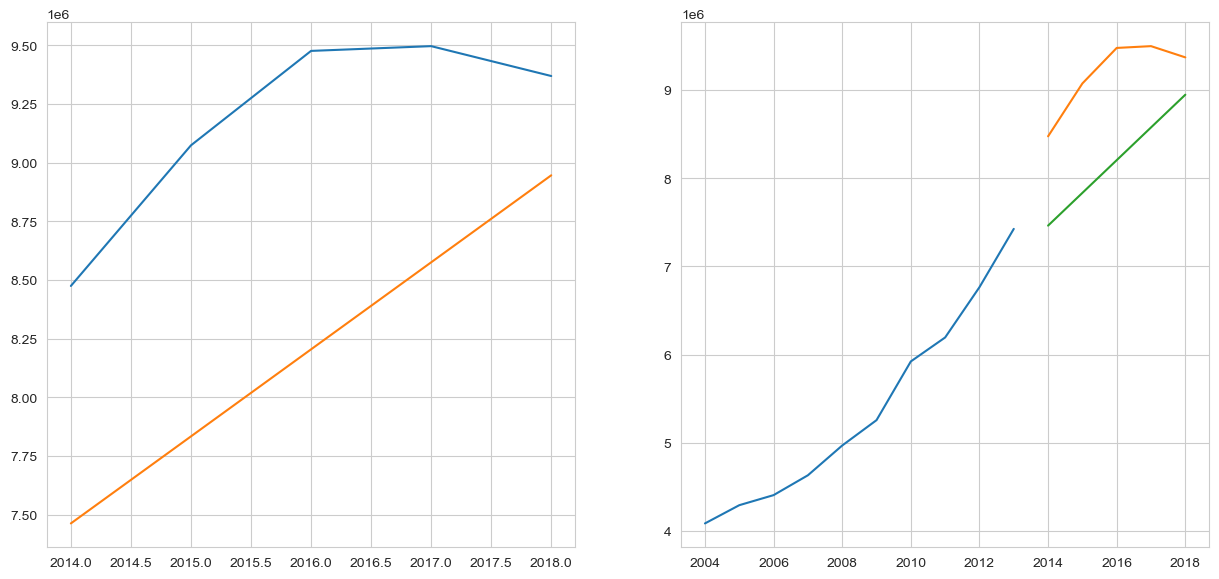

In [94]:
fig = plt.figure(figsize=(15,15))
a = 1
fig.add_subplot(221)
plt.plot(xtest[a], ytest[a])
plt.plot(xtest[a], previsao[a])

fig.add_subplot(222)
plt.plot(xtrain[a], ytrain[a])
plt.plot(xtest[a], ytest[a])
plt.plot(xtest[a], previsao[a])


In [95]:
#for train_index, test_index in tss.split(X):
#    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#    res.fit(X_train, y_train)
#    y_train, y_test = y.iloc[train_index], y.iloc[test_index]



In [96]:
#residuais=ytest["total_por_regiao"] - ymodel
#plt.title("Residuais x Valor estimado")
#plt.scatter(ymodel, residuais)
#plt.axhline(y=0, color="r", linestyle="--")
#plt.xlabel("Consumo previsto")
#plt.ylabel("Erro residual")
#plt.show()

In [97]:
model_poly = SVR(kernel="poly", C=10, epsilon=0.05, gamma=0.05)
#res2 = TransformedTargetRegressor(regressor=model_poly, transformer=scaler).fit(Xtrain["ANO"].values.reshape(-1,1), ytrain["total_por_regiao"])
#model2.fit(Xtrain_ar.iloc[:5], ytrain_ar.iloc[:5])

In [98]:
res2 = TransformedTargetRegressor(regressor=model_poly, transformer=MinMaxScaler())

In [99]:
#cross_val_score(res2, X.values.reshape(-1, 1), y, scoring="r2", cv=tss)